In [3]:
%run 5.kalman.ipynb

Dataset salvo em ../datasets/edges.csv
     src   dest       rssi       etx      delay  busy_fraction  label
0  41338  98602 -53.986512  2.268076  36.769583       0.081641      1
1  54719  79214 -85.716929  5.902372  93.427034       0.401344      0
2  62065  21006 -60.536494  6.037843  40.720208       0.938218      0
3  50711  59995 -42.909099  2.598584  13.287878       0.106369      1
4  46597  84191 -31.623506  2.100315   7.886748       0.067208      1

Distribuição dos labels:
label
1    100000
0    100000
Name: count, dtype: int64


Epoch 0, Loss 0.7869, Train Acc 0.3988, Test Acc 0.4476
Epoch 10, Loss 0.3892, Train Acc 0.9608, Test Acc 0.9638
Epoch 20, Loss 0.1472, Train Acc 0.9760, Test Acc 0.9776
Epoch 30, Loss 0.0696, Train Acc 0.9829, Test Acc 0.9835
Epoch 40, Loss 0.0479, Train Acc 0.9856, Test Acc 0.9862

Acurácia final no conjunto de teste: 0.9872

Matriz de Confusão:
[[29482   518]
 [  252 29748]]

Relatório de Classificação:
              precision    recall  f1-score   s

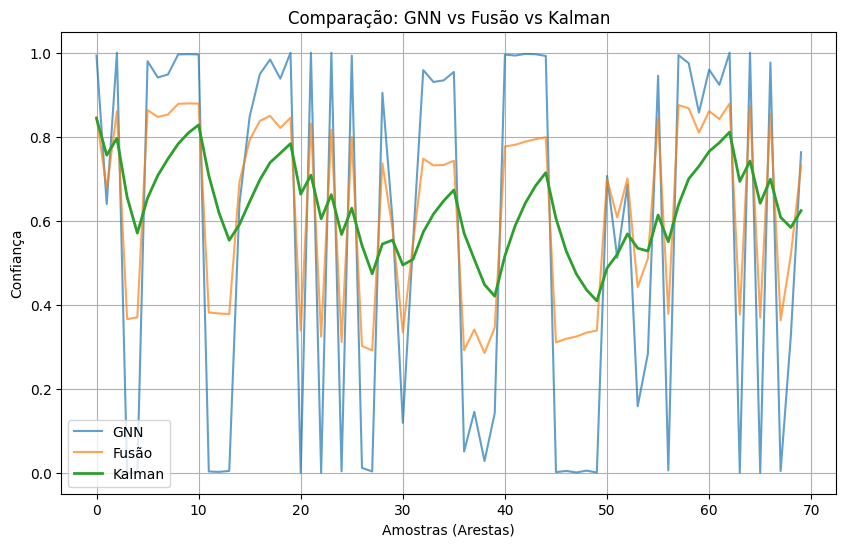

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# ====== Plot comparando ML, Fusão e Kalman ======
plt.figure(figsize=(10,6))
plt.plot(prob_ml, label="GNN", alpha=0.7)
plt.plot(fusion_scores, label="Fusão", alpha=0.7)
plt.plot(kalman_scores, label="Kalman", linewidth=2)
plt.xlabel("Amostras (Arestas)")
plt.ylabel("Confiança")
plt.title("Comparação: GNN vs Fusão vs Kalman")
plt.legend()
plt.grid(True)
plt.show()

### Comparação: GNN vs Fusão vs Kalman

O gráfico mostra a comparação entre GNN, Fusão e Kalman em várias amostras.
A GNN atinge valores altos de confiança, mas é bastante instável, caindo a zero em vários pontos.
A Fusão apresenta resultados mais estáveis, geralmente entre 0.6 e 0.9, embora com quedas ocasionais.
Já o Kalman é o mais regular, mantendo uma linha mais suave, mas com valores médios inferiores aos da GNN.
Assim, a GNN tem maior potencial, porém a Fusão e o Kalman oferecem mais consistência.

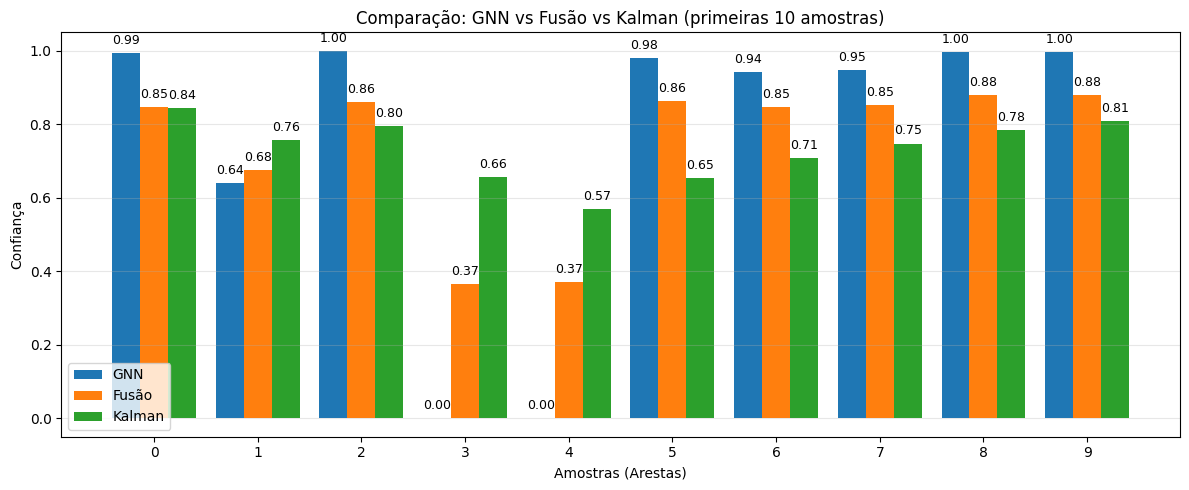

In [39]:
import numpy as np
import matplotlib.pyplot as plt

N = min(10, len(prob_ml))
idx = np.arange(N)
ml_10  = np.array(prob_ml[:N])
fus_10 = np.array(fusion_scores[:N])
kal_10 = np.array(kalman_scores[:N])

bar_w = 0.27
fig, ax = plt.subplots(figsize=(12, 5))
b1 = ax.bar(idx - bar_w, ml_10,  width=bar_w, label="GNN")
b2 = ax.bar(idx,          fus_10, width=bar_w, label="Fusão")
b3 = ax.bar(idx + bar_w,  kal_10, width=bar_w, label="Kalman")

ymin = -0.05
ymax = 1.05           
ax.set_ylim(ymin, ymax)

ticks = np.linspace(0, 1, 6)  
ax.set_yticks(ticks)
ax.set_yticklabels([f"{t:.1f}" for t in ticks])

dy = 0.015 * (ymax - ymin)

def annotate_bars(bars, fmt="{:.2f}", delta=dy):
    for bar in bars:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2., h + delta,
            fmt.format(h),
            ha="center", va="bottom", fontsize=9, clip_on=False
        )

annotate_bars(b1)
annotate_bars(b2)
annotate_bars(b3)

plt.title("Comparação: GNN vs Fusão vs Kalman (primeiras 10 amostras)")
plt.xlabel("Amostras (Arestas)")
plt.ylabel("Confiança")
plt.xticks(idx, [str(i) for i in idx])
plt.legend(loc="lower left")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### Comparação: GNN vs Fusão vs Kalman (primeiras 10 amostras

O gráfico compara a confiança dos métodos GNN, Fusão e Kalman em 10 amostras.

- A GNN apresenta os melhores resultados na maioria dos casos, chegando a 1.0 em várias amostras, mostrando-se mais consistente e confiável.
- A Fusão mantém desempenho intermediário, mas cai bastante em algumas amostras (3 e 4).
- O Kalman é mais irregular: em certos pontos supera a Fusão, mas geralmente fica abaixo da GNN.

No geral, a GNN é o método mais robusto, enquanto Fusão e Kalman variam mais nos resultados.

C:\Users\charl\AppData\Local\Temp\ipykernel_22784\2759037155.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


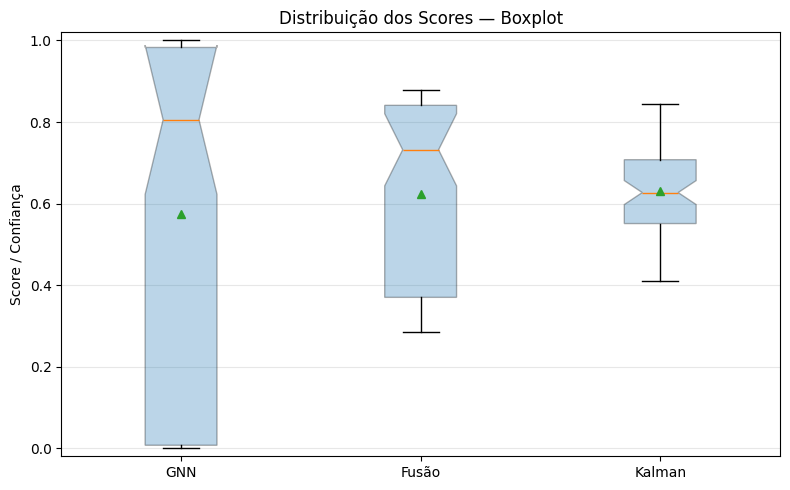

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    np.asarray(prob_ml),
    np.asarray(fusion_scores),
    np.asarray(kalman_scores),
]

labels = ["GNN", "Fusão", "Kalman"]

fig, ax = plt.subplots(figsize=(8, 5))
bp = ax.boxplot(
    data,
    labels=labels,
    showmeans=True,           
    meanline=False,
    notch=True,               
    patch_artist=True         
)

for patch in bp['boxes']:
    patch.set_alpha(0.3)

ymin, ymax = -0.02, 1.02
ax.set_ylim(ymin, ymax)
ticks = np.linspace(0, 1, 6)
ax.set_yticks(ticks)
ax.set_yticklabels([f"{t:.1f}" for t in ticks])

ax.set_title("Distribuição dos Scores — Boxplot")
ax.set_ylabel("Score / Confiança")
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### Distribuição dos Scores — Boxplot

O boxplot mostra a distribuição dos scores de confiança para GNN, Fusão e Kalman.
A GNN apresenta maior variação: vai de 0 até quase 1.0, mas com mediana alta (~0.8), indicando grande potencial, embora instável.
A Fusão é mais consistente, com mediana próxima de 0.75 e menor dispersão, mas sem atingir valores tão altos quanto a GNN.
O Kalman é o mais estável, com menor variação e resultados concentrados em torno de 0.6–0.7, porém não alcança picos elevados.

Assim, conclui-se que:

- GNN = melhor desempenho máximo, mas irregular.
- Fusão = equilíbrio entre estabilidade e valores altos.
- Kalman = maior consistência, porém limitado em confiança.

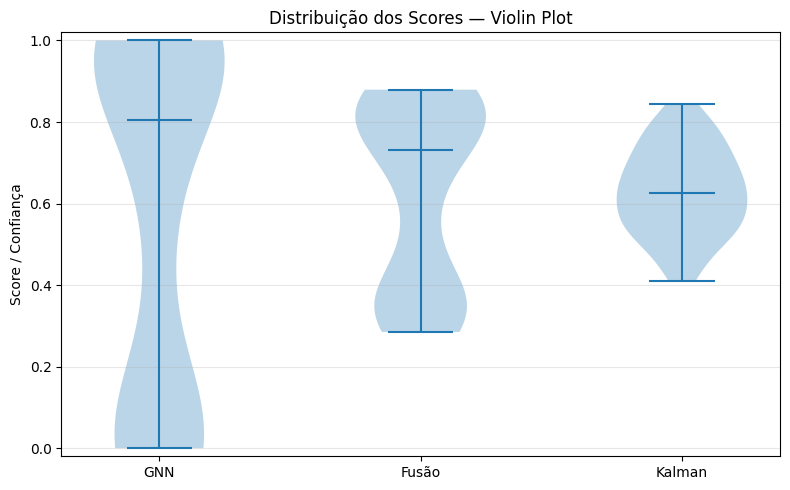

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    np.asarray(prob_ml),
    np.asarray(fusion_scores),
    np.asarray(kalman_scores),
]

labels = ["GNN", "Fusão", "Kalman"]

fig, ax = plt.subplots(figsize=(8, 5))
parts = ax.violinplot(
    data,
    showmeans=False,
    showmedians=True,     
    showextrema=True
)

ax.set_xticks(np.arange(1, len(labels)+1))
ax.set_xticklabels(labels)

for pc in parts['bodies']:
    pc.set_alpha(0.3)

ymin, ymax = -0.02, 1.02
ax.set_ylim(ymin, ymax)
ticks = np.linspace(0, 1, 6)
ax.set_yticks(ticks)
ax.set_yticklabels([f"{t:.1f}" for t in ticks])

ax.set_title("Distribuição dos Scores — Violin Plot")
ax.set_ylabel("Score / Confiança")
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### Distribuição dos Scores — Violin Plot

O violin plot mostra a distribuição dos scores de confiança:

- A GNN tem grande variação, indo de 0 até 1.0, com duas concentrações claras (valores baixos e muito altos). Isso confirma sua alta performance máxima, mas instabilidade.
- A Fusão apresenta distribuição mais concentrada entre 0.6 e 0.85, com mediana em torno de 0.75, mostrando estabilidade e bons valores.
- O Kalman é o mais regular, com concentração próxima de 0.6–0.7, mas limitado em alcançar valores muito altos.

Em resumo: GNN = maior potencial, porém instável; Fusão = equilíbrio; Kalman = consistência moderada.